## Newly added in response to reviewers' comments - This notebook get C/10 charge curves from orignal data

### Finish remark: have extracted original data of Exp-3, cell D, E, F, C/10 charge step data and save for reload. Path: \SimSave\InputData\Expt 3 - Cathode Degradation and Li-Plating\0.1C Voltage Curves

In [43]:
import pybamm as pb;import pandas as pd;import numpy as np;import os;
import matplotlib.pyplot as plt;import os
from scipy.io import savemat,loadmat;
import matplotlib as mpl; 
fs=10;
font = {'family' : 'DejaVu Sans','size'   : fs}
mpl.rc('font', **font)

# Add path to system to ensure Fun_NC can be used
import sys  
str_path_0 = os.path.abspath(os.path.join(pb.__path__[0],'..'))
str_path_1 = os.path.abspath(
    os.path.join(str_path_0,"wip/Rio_Code/Fun_P2"))
sys.path.append(str_path_1) 
Path_Input = os.path.expanduser(
    "~/EnvPBGEM_NC/SimSave/InputData/") # for Linux
BasicPath =  os.path.expanduser(
    "~/EnvPBGEM_NC/SimSave/P2_R9_Dim")
# \Expt 3 - Cathode Degradation and Li-Plating\0.1C Voltage Curves

In [44]:
def read_mpt(
        filename, rowsToSkip = 0, 
        colsToKeep = [
            "time/s", "Ecell/V", "I/mA", "(Q-Qo)/mA.h", "Temperature/ｰC", 
            "Ns"]):
    return pd.read_csv(
        filename, encoding = "shift-jis", 
        skiprows = rowsToSkip, sep = "\t", 
        usecols = colsToKeep)
time = "Time (s)"
V = "Voltage (V)"
I = "Current (mA)"
T = "Temperature (degC)"
Qdis = "Charge (mA.h)"
Step_No = "Step_No"
def rename_cols(
        df, oldNames = [
            "time/s", "Ecell/V", "I/mA", 
            "Temperature/ｰC", "(Q-Qo)/mA.h","Ns" ], 
            newNames = [time, V, I,  T, Qdis, "Step_No" ]):
    return df.rename(columns={i:j for i,j in zip(oldNames,newNames)})


In [45]:
# also need C/10 charge curves  - pick Exp-3, cell D, E, F (aged at 25degC)
filename_D = (
    Path_Input + "Expt 3 - Cathode Degradation and Li-Plating/0.1C Voltage Curves/"
    + "NDK - LG M50 deg - exp 3 - rig 3 - 25degC - cell D - BoL (slow)_01_MB_CA6.mpt")
file_save_D = (
    Path_Input + "Expt 3 - Cathode Degradation and Li-Plating/0.1C Voltage Curves/cell D/"
    + "Expt 3 - cell D - RPT0 - 0.1C charge data.csv")

filename_E = (
    Path_Input + "Expt 3 - Cathode Degradation and Li-Plating/0.1C Voltage Curves/"
    + "NDK - LG M50 deg - exp 3 - rig 3 - 25degC - cell E - BoL (slow)_01_MB_CA7.mpt")
file_save_E = (
    Path_Input + "Expt 3 - Cathode Degradation and Li-Plating/0.1C Voltage Curves/cell E/"
    + "Expt 3 - cell E - RPT0 - 0.1C charge data.csv")

filename_F = (
    Path_Input + "Expt 3 - Cathode Degradation and Li-Plating/0.1C Voltage Curves/"
    + "NDK - LG M50 deg - exp 3 - rig 3 - 25degC - cell F - BoL (slow)_01_MB_CA8.mpt")
file_save_F = (
    Path_Input + "Expt 3 - Cathode Degradation and Li-Plating/0.1C Voltage Curves/cell F/"
    + "Expt 3 - cell F - RPT0 - 0.1C charge data.csv")

Filenames = [filename_D,  filename_E,  filename_F ]
File_save = [file_save_D, file_save_E, file_save_F]
i = 2

df = read_mpt(Filenames[i])
df = rename_cols(df)

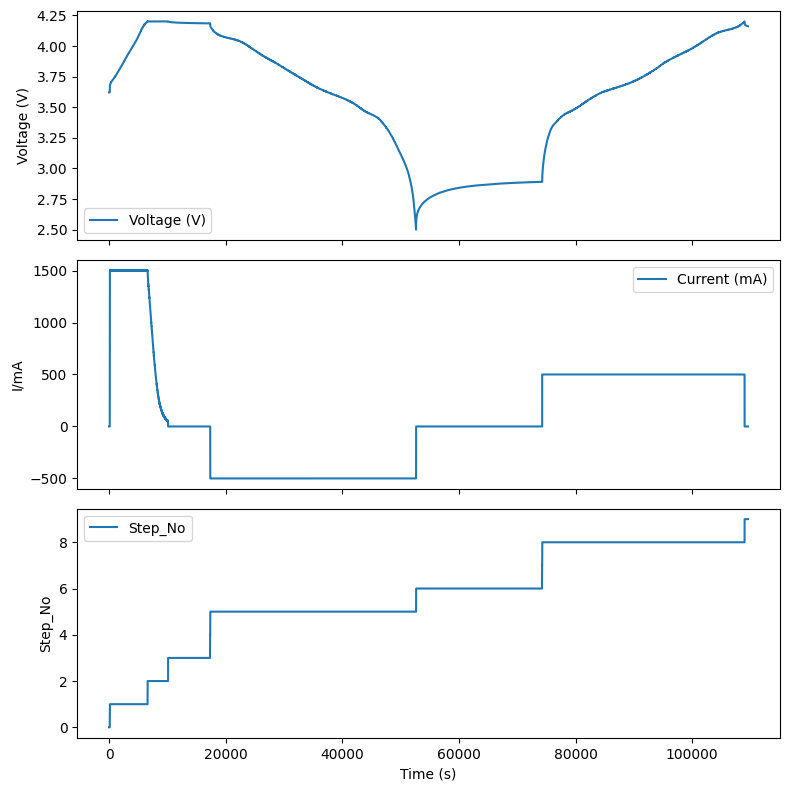

In [46]:
# plot
def Plot(df):
    fig, ax = plt.subplots(3,1, sharex=True, figsize=(8,8))
    df.plot(time,  V, ax=ax[0])
    ax[0].set_ylabel('Voltage (V)')

    df.plot(time,  I , ax=ax[1])
    ax[1].set_ylabel("I/mA")

    df.plot(time, Step_No, ax=ax[2])
    ax[2].set_ylabel("Step_No")

    fig.tight_layout()
    return 
Plot(df)

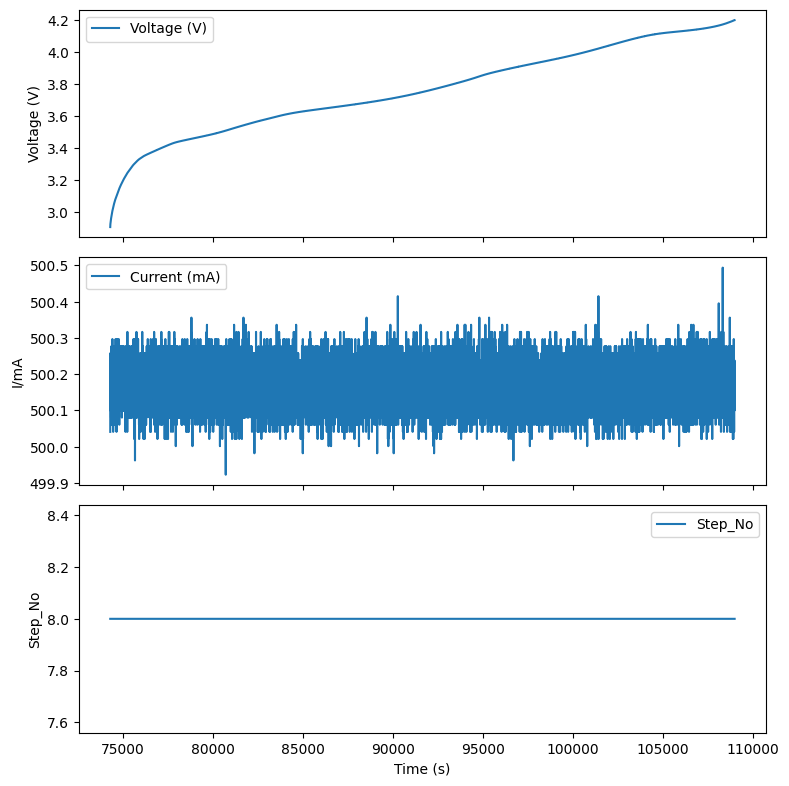

In [47]:
# from the above, we know that we should pick step 8
filtered_df = df[df["Step_No"] == 8]
Plot(filtered_df)

In [48]:
# save to files:
filtered_df = filtered_df.drop(columns=["Step_No"])
filtered_df.to_csv(File_save[i],index=False)